<a href="https://colab.research.google.com/github/HammadN98/pytorch/blob/main/04_pytorch_dados_personalizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Pytorch para datasets proprios

## Cada tipo tem um "pytorch" proprio

* Texto - torchtext
* Audio - torchaudio
* Sistema de Recomendacao - torchrec
* Visao computacional - torchvision

Cada tipo tem uma biblioteca para funcoes de carregamento de dados e funcoes customizadas para o mesmo

## 0. Importando Pytorch e fazendo o selecionador de dispositivo

In [1]:
import torch
from torch import nn

torch.__version__

'2.3.1+cu121'

In [2]:
#Diagnostico de dispositivo
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Conseguindo os dados

O dataset usado eh um sub dataset do Food101

O conjunto original possui 101 classes diferentes e 1000 imagens por classe, sendo 750 de treino e 250 para teste.
O sub conjunto possui apenas 3 classes(stake, pizza, sushi) e apenas 10% de imagens. +-75 para treino e =-25 para teste.
O Pq disso?
Segundo o professor, e importnte comecar projetos de ML de maineira pequena e ir incrementando conforme necessidade. Tal tecnica de da pela velocidade que se pode experimentar coisas novas com um conjunto pequeno que nao demora para ser processado e tranformado e treinando, bem como testado.

In [9]:
import requests
import zipfile
from pathlib import Path
#COnfigurando o caminho para a pasta "data"
data_path = Path("data/")
image_path = data_path / "pizza_stake_sushi"

#Se a pasta das imagens nao existe, iremos criar e baixar os dados d github
if image_path.is_dir():
  print(f"{image_path} Diretorio existente, pulando download...")
else:
  print(f"{image_path} nao existe, criando...")
  image_path.mkdir(parents=True, exist_ok=True)

#Baixzando os dados pizza, steak, sushi
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/HammadN98/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Baixando os dados...")
  f.write(request.content)

#Descompactando os dados
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Descompactando")
  zip_ref.extractall(image_path)

data/pizza_stake_sushi Diretorio existente, pulando download...
Baixando os dados...
Descompactando


## 2. Tornando-se um com os dados(preparacao e exploracao)


In [10]:
import os
def walk_through_dir(dir_path):
  """Passa por todo o diretorio e retorna o conteudo"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"Tem {len(dirnames)} diretorios e {len(filenames)} imagens no '{dirpath}")

In [11]:
walk_through_dir(image_path)

Tem 2 diretorios e 0 imagens no 'data/pizza_stake_sushi
Tem 3 diretorios e 0 imagens no 'data/pizza_stake_sushi/train
Tem 0 diretorios e 78 imagens no 'data/pizza_stake_sushi/train/pizza
Tem 0 diretorios e 75 imagens no 'data/pizza_stake_sushi/train/steak
Tem 0 diretorios e 72 imagens no 'data/pizza_stake_sushi/train/sushi
Tem 3 diretorios e 0 imagens no 'data/pizza_stake_sushi/test
Tem 0 diretorios e 25 imagens no 'data/pizza_stake_sushi/test/pizza
Tem 0 diretorios e 19 imagens no 'data/pizza_stake_sushi/test/steak
Tem 0 diretorios e 31 imagens no 'data/pizza_stake_sushi/test/sushi


In [12]:
#Configurando os caminhos de treino e teste
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_stake_sushi/train'),
 PosixPath('data/pizza_stake_sushi/test'))

## 2.1 VIsualizando as Imagens

Os seguintes codigos terao a funcao de:

1. COnseguir todo o caminho de imagens
2. Escolher uma imagem de maneira aleatoria usaondo `random.choice()`
3. Pegar o nome da classe da imagem usando `pathlib.Path.parent.stem`
4. COmo estamos trabalhando com imagens, vamos abrir a imagem com Python'sPIL
5. Mosrar a imsgem e seus metadados

In [13]:
image_path

PosixPath('data/pizza_stake_sushi')

Caminho da Imagem aleatoria: data/pizza_stake_sushi/train/pizza/3018077.jpg
Classe da Imagem: pizza
Altura da Imagem: 512
Largura da Imagem: 512


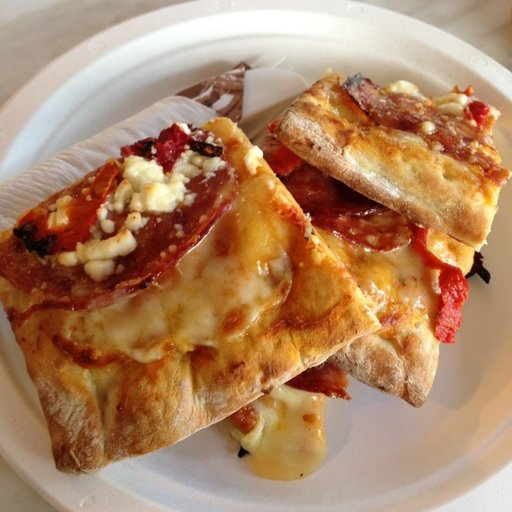

In [24]:
import random
from PIL import Image

#Seed
random.seed(42)

# 1. COnseguindo todos os caminhso das imagens
image_path_list = list(image_path.glob("*/*/*.jpg"))
#image_path_list

# 2. Escolhendo uma imagem aleatoria
random_image_path = random.choice(image_path_list)
#print(random_image_path)

# 3. Nome da classe apartir do paht name(A classe da imagem corresponde a pasta que a imagem se encontra)
image_class = random_image_path.parent.stem
#print(f"\n {image_class}")

# 4. Abrindo a imagem
img = Image.open(random_image_path)

# 5. Printando os metadados
print(f"Caminho da Imagem aleatoria: {random_image_path}")
print(f"Classe da Imagem: {image_class}")
print(f"Altura da Imagem: {img.height}")
print(f"Largura da Imagem: {img.width}")
img


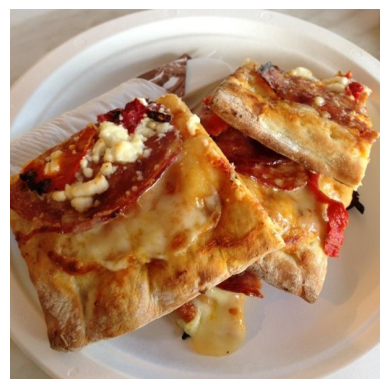

In [26]:
import matplotlib.pyplot as plt

#PAra carregar
ims_plt = plt.imread(random_image_path)

#Para exibir
plt.imshow(img)

#Removendo eixo
plt.axis("off")

# Mostrar a imagem
plt.show()